In [1]:
import torch
import random
import numpy as np
import keras

# Semilla común para prevenir la obtención de resultados distintos en cada ejecución
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)
np.random.seed(42)
random.seed(42)
keras.utils.set_random_seed(42)

In [2]:
# Cargar las librerías necesarias
import pandas as pd
import sklearn
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Cargar los datos
Nuestra base de datos está formada por 50.000 filas y 36 columnas, siendo las dos últimas nuestras variables objetivo: "*CreditoAprobado*" y "*ScoreRiesgo*".

In [3]:
# Leemos la base de datos
bd = pd.read_csv('data/EstudioCrediticio_TrainP.csv')
bd

,Id,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
0,1,44.0,22119.0,613.0,Empleado/a por cuenta ajena,FP,20.0,16154.0,60.0,Divorciado/a,...,1843.250000,0.771340,2.0,28390.0,0.179654,0.171628,402.883608,0.483322,0.0,50.0
1,2,26.0,28874.0,582.0,Empleado/a por cuenta ajena,Bachillerato,0.0,11800.0,24.0,Divorciado/a,...,2406.166667,NaN,6.0,115113.0,0.160800,0.172783,584.997790,0.541524,0.0,54.0
2,3,38.0,84154.0,507.0,Empleado/a por cuenta ajena,Grado universitario,17.0,9257.0,36.0,Divorciado/a,...,7012.833333,0.881874,4.0,41268.0,0.205757,0.217175,352.177802,0.074460,1.0,42.4
3,4,51.0,29464.0,504.0,Autónomo/a,FP,25.0,5495.0,36.0,Divorciado/a,...,2455.333333,0.797217,5.0,1927.0,0.203495,0.197683,203.565671,0.246633,1.0,45.6
4,5,39.0,20646.0,542.0,Empleado/a por cuenta ajena,Grado universitario,16.0,14824.0,60.0,Soltero/a,...,1720.500000,0.714030,3.0,10011.0,0.213824,0.212976,403.524570,0.375196,0.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46745,46746,60.0,59836.0,631.0,Empleado/a por cuenta ajena,NaN,NaN,3725.0,36.0,Casado/a,...,4986.333333,0.815294,9.0,125554.0,0.138225,0.141121,127.514615,0.158135,1.0,40.8
46746,46747,43.0,30441.0,581.0,Empleado/a por cuenta ajena,Bachillerato,21.0,6636.0,96.0,Divorciado/a,...,2536.750000,0.932594,4.0,34423.0,0.216136,0.211696,143.923633,0.191948,0.0,58.0
46747,46748,47.0,54184.0,628.0,Empleado/a por cuenta ajena,Grado universitario,29.0,6306.0,12.0,Divorciado/a,...,4515.333333,0.779268,6.0,29129.0,0.122306,0.109696,557.245200,0.247655,1.0,43.2
46748,46749,57.0,28221.0,NaN,Empleado/a por cuenta ajena,Grado universitario,NaN,22847.0,48.0,NaN,...,2351.750000,0.912883,3.0,58192.0,0.169347,0.147692,633.179081,0.415086,0.0,64.0


In [4]:
# Borramos la columna ID que no interesa ya que no nos aporta ninguna información
del bd['Id']

# Preprocesamiento

In [5]:
# Mostramos los nombres de las columnas
bd.columns

Index(['Edad', 'IngresoBrutoAnual', 'ScoreCrediticio', 'SituacionLaboral',
       'NivelEducativo', 'Experiencia', 'CuantiaCredito', 'DuracionCredito',
       'EstadoCivil', 'NumeroPersonasDependientes', 'EstadoVivienda',
       'PagoMensualDeuda', 'TasaUtilizacionTarjetaCredito',
       'NumeroLineasCreditoAbiertas', 'NumeroSolicitudesCredito',
       'RatioDeudaIngresos', 'HistoricoInsolvencia', 'ObjetoCredito',
       'HistoricoImpagos', 'HistoricoPagos', 'DuracionHistoricoCredito',
       'BalanceCuentaAhorros', 'BalanceCuentaCorriente', 'TotalActivos',
       'TotalPasivos', 'IngresoBrutoMensual', 'HistoricoPagosSuministros',
       'EstabilidadLaboral', 'PatrimonioNeto', 'TipoInteresBase',
       'TipoInteres', 'PagoMensualCredito', 'RatioTotalDeudaIngresos',
       'CreditoAprobado', 'ScoreRiesgo'],
      dtype='object')

## Balance de los datos

**Clasificación**

Comprobamos el número de instancias para cada clase de la variable objetivo "*CreditoAprobado*", para ver si nuestros datos están balanceados.

In [6]:
bd['CreditoAprobado'].value_counts()

,count
CreditoAprobado,
0.0,33014
1.0,13735


En la tabla podemos observar que la base de datos no está balanceada. Esto lo resolveremos con la técnica de sobremuestreo SMOTE en la sección "Dividir en Train y Test".

**Regresión**

Visualizamos la distribución de la variable objetivo "*ScoreRiesgo*", para ver si nuestros datos siguen una distribución normal.

count    46749.000000
mean        50.730326
std          7.915727
min         26.400000
25%         44.800000
50%         52.000000
75%         56.000000
max         81.000000
Name: ScoreRiesgo, dtype: float64


<Axes: ylabel='Frequency'>

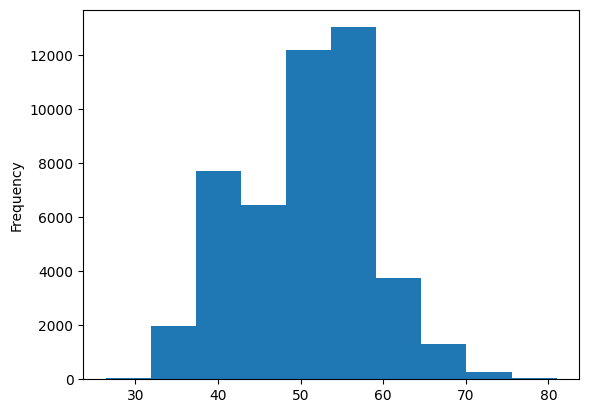

In [7]:
print(bd['ScoreRiesgo'].describe())
bd['ScoreRiesgo'].plot(kind='hist')

Podemos observar a partir del histograma que los datos siguen una distribución normal, ligeramente situada a la izquierda.

Además, el rango de valores es de [26.4, 81], siendo la media 50.74. Por último, la mayoría de los valores se encuentran entre 45 y 56.

## Outliers
Iteramos sobre cada columna y eliminamos aquellas instancias que contengan datos atípicos, es decir, aquellas instancias que estén por debajo del cuartil 0.02 o por encima del cuartil 0.98.

In [8]:
attributes = bd.columns[:-2]
outliers = pd.DataFrame()

for a in attributes:
  if a == "CreditoAprobado" or a == "ScoreRiesgo":
    break
  if "int" in str(bd[a].dtype) or "float" in str(bd[a].dtype):

    upper = bd[a].quantile(0.98) + (1.5 * (bd[a].quantile(0.98) - bd[a].quantile(0.02)))
    lower = bd[a].quantile(0.02) - (1.5 * (bd[a].quantile(0.98) - bd[a].quantile(0.02)))
    outliers = pd.concat([outliers, bd[(bd[a] < lower) | (bd[a] > upper)]])

bd = pd.merge(bd, pd.DataFrame(outliers), how = 'outer', indicator = True)
bd = bd[bd['_merge'] == 'left_only'].drop(columns = '_merge')
bd


,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,NumeroPersonasDependientes,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
0,18.0,15000.0,369.0,Empleado/a por cuenta ajena,Bachillerato,0.0,22117.0,60.0,Divorciado/a,0.0,...,1250.000000,NaN,4.0,47004.0,0.307617,0.358682,797.272537,1.496218,0.0,65.0
1,18.0,15000.0,395.0,Empleado/a por cuenta ajena,Grado universitario,0.0,11939.0,96.0,Divorciado/a,3.0,...,1250.000000,0.800251,4.0,3104.0,0.314439,0.303039,331.770771,0.530217,0.0,59.0
2,18.0,15000.0,397.0,Empleado/a por cuenta ajena,FP,0.0,12246.0,60.0,Soltero/a,NaN,...,1250.000000,0.766018,1.0,6190.0,0.283746,0.307244,401.665978,0.771733,0.0,56.0
3,18.0,15000.0,398.0,Empleado/a por cuenta ajena,Bachillerato,0.0,28223.0,60.0,Casado/a,0.0,...,1250.000000,0.917258,5.0,78330.0,0.299223,0.322021,951.649811,1.223720,0.0,53.0
4,18.0,15000.0,405.0,Empleado/a por cuenta ajena,Grado universitario,0.0,2340.0,36.0,NaN,1.0,...,1250.000000,0.923565,3.0,5830.0,0.249840,0.248284,92.825790,0.298261,0.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46845,80.0,65688.0,590.0,Empleado/a por cuenta ajena,FP,62.0,13691.0,120.0,Soltero/a,4.0,...,5474.000000,0.864048,6.0,91875.0,0.238691,0.214496,277.876148,0.151603,1.0,44.0
46846,80.0,67713.0,681.0,Empleado/a por cuenta ajena,Máster,59.0,37471.0,36.0,NaN,4.0,...,5642.750000,0.970095,7.0,69786.0,0.146971,0.151390,1301.496077,0.344778,0.0,49.0
46847,80.0,137165.0,597.0,Empleado/a por cuenta ajena,Grado universitario,NaN,7914.0,36.0,Soltero/a,2.0,...,11430.416667,0.603614,4.0,1927.0,0.159414,0.127531,265.713834,0.043718,1.0,44.0
46848,80.0,156752.0,525.0,Empleado/a por cuenta ajena,Bachillerato,59.0,18152.0,60.0,Casado/a,NaN,...,13062.666667,0.856159,4.0,260251.0,0.225652,0.240425,522.644194,0.061828,1.0,38.4


## Duplicados
Comprobamos si existen algunas instancias que estén repetidas.

In [9]:
bd[bd.duplicated()]

,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,NumeroPersonasDependientes,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo


No hay datos duplicados.

## Valores nulos
Comprobamos si existen valores vacíos o nulos, y en caso positivo, reemplazarlos.

In [10]:
empty = bd.apply(lambda col: pd.isnull(col)).sum()
empty[ empty > 0 ]

,0
Edad,1
IngresoBrutoAnual,1
ScoreCrediticio,2337
SituacionLaboral,1
NivelEducativo,4653
Experiencia,12077
CuantiaCredito,1
DuracionCredito,1
EstadoCivil,10197
NumeroPersonasDependientes,5561


Podemos observar que hay 7 columnas con valores nulos. Además, hemos decidido reemplazar todos los valores nulos en vez de eliminar las instancias tras considerar que no hay una proporción lo suficientemente grande como para descartar la columna entera.

### Reemplazar los valores nulos por la mediana o el valor más frecuente de la variable correspondiente.

In [11]:
# Separamos las columnas numéricas y las categóricas
numerical_cols = bd.select_dtypes(include=['number']).columns
categorical_cols = bd.select_dtypes(exclude=['number']).columns

# Aplicamos el imputador con la estrategia de la mediana a las columnas numéricas
imputer_num = SimpleImputer(strategy='median')
bd[numerical_cols] = imputer_num.fit_transform(bd[numerical_cols])

# Aplicamos el imputador con la estrategia del valor más frecuente a las columnas categóricas
imputer_cat = SimpleImputer(strategy='most_frequent')
bd[categorical_cols] = imputer_cat.fit_transform(bd[categorical_cols])

# Guardamos cada uno de los imputers
joblib.dump(imputer_num, 'imputers/imputer_num.pkl')
joblib.dump(imputer_cat, 'imputers/imputer_cat.pkl')

['imputers/imputer_cat.pkl']

In [12]:
bd.apply(lambda col: pd.isnull(col)).sum()

,0
Edad,0
IngresoBrutoAnual,0
ScoreCrediticio,0
SituacionLaboral,0
NivelEducativo,0
Experiencia,0
CuantiaCredito,0
DuracionCredito,0
EstadoCivil,0
NumeroPersonasDependientes,0


Podemos ver que ya no tenemos valores nulos en nuestra base de datos.

## Label Encoding

Transformamos las columnas categóricas a numéricas.

In [13]:
le = LabelEncoder()

# Aplicamos LabelEncoder a cada una de las columnas categóricas
for col in categorical_cols:
    bd[col] = le.fit_transform(bd[col])

# Guardamos el LabelEncoder
joblib.dump(le, 'encoders/le.pkl')

['encoders/le.pkl']

In [14]:
# Imprimimos los tipos de datos en nuestra base de datos
bd.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

Podemos observar que todas nuestras columnas son numéricas

## Correlaciones entre variables

In [16]:
# Correlaciones entre variables
corr_bd = bd.corr(method="pearson")
corr_bd

,Edad,IngresoBrutoAnual,ScoreCrediticio,SituacionLaboral,NivelEducativo,Experiencia,CuantiaCredito,DuracionCredito,EstadoCivil,NumeroPersonasDependientes,...,IngresoBrutoMensual,HistoricoPagosSuministros,EstabilidadLaboral,PatrimonioNeto,TipoInteresBase,TipoInteres,PagoMensualCredito,RatioTotalDeudaIngresos,CreditoAprobado,ScoreRiesgo
Edad,1.000000,0.145294,0.310462,-0.008405,0.001895,0.843955,0.002719,0.000342,-0.002950,-0.005561,...,0.146450,-0.004637,0.008873,-0.003013,-0.243005,-0.210296,-0.014807,-0.115563,0.145720,-0.167098
IngresoBrutoAnual,0.145294,1.000000,0.104713,-0.024081,0.098523,0.126711,0.003971,0.006614,0.007519,-0.004649,...,0.991313,0.001943,0.002797,-0.003514,-0.078420,-0.070246,-0.005486,-0.557078,0.568257,-0.465708
ScoreCrediticio,0.310462,0.104713,1.000000,-0.028621,0.155908,0.268414,0.005487,-0.006001,0.008629,0.002800,...,0.105836,-0.005280,0.006462,-0.007860,-0.742428,-0.647261,-0.047331,-0.105253,0.151626,-0.235532
SituacionLaboral,-0.008405,-0.024081,-0.028621,1.000000,-0.076649,-0.005357,0.002419,-0.009121,-0.003964,0.000327,...,-0.024413,0.003449,0.006594,-0.005556,0.017104,0.017568,0.010101,0.018642,-0.014438,-0.045476
NivelEducativo,0.001895,0.098523,0.155908,-0.076649,1.000000,0.003880,0.004246,0.004390,0.006172,-0.001840,...,0.100269,-0.001193,0.003834,-0.000181,-0.118568,-0.103391,-0.010447,-0.084803,0.147225,-0.125598
Experiencia,0.843955,0.126711,0.268414,-0.005357,0.003880,1.000000,-0.001266,0.002510,-0.001915,-0.006281,...,0.127780,-0.003976,0.010435,-0.001176,-0.210205,-0.183515,-0.016572,-0.103055,0.124921,-0.144202
CuantiaCredito,0.002719,0.003971,0.005487,0.002419,0.004246,-0.001266,1.000000,0.002301,-0.005551,0.004970,...,0.004622,-0.000390,-0.007339,0.006444,0.233067,0.210269,0.740919,0.407629,-0.235463,0.140208
DuracionCredito,0.000342,0.006614,-0.006001,-0.009121,0.004390,0.002510,0.002301,1.000000,-0.008449,0.001112,...,0.006280,0.002034,0.004946,0.002422,0.606449,0.530772,-0.429755,-0.237239,-0.104221,0.062091
EstadoCivil,-0.002950,0.007519,0.008629,-0.003964,0.006172,-0.001915,-0.005551,-0.008449,1.000000,-0.002309,...,0.008024,0.004040,-0.005584,0.007701,-0.012125,-0.010006,-0.002015,-0.004762,0.006930,-0.011004
NumeroPersonasDependientes,-0.005561,-0.004649,0.002800,0.000327,-0.001840,-0.006281,0.004970,0.001112,-0.002309,1.000000,...,-0.004851,0.002776,-0.005046,0.003939,-0.000003,0.003415,0.004292,0.005393,-0.002441,0.004295


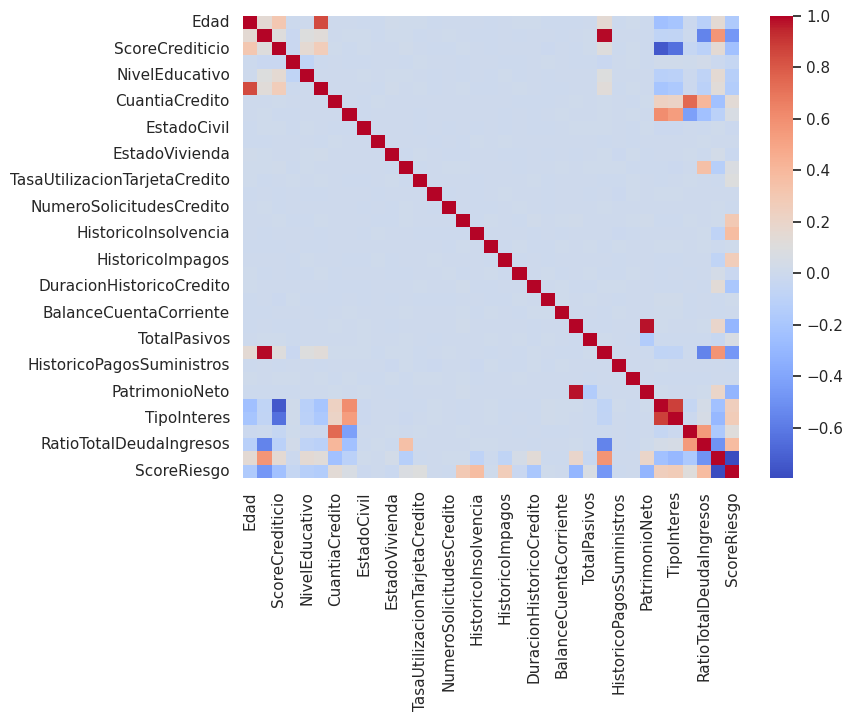

In [42]:
# Visualizamos la matriz de correlaciones entre variables
plt.figure(figsize=(8, 6))
sns.heatmap(corr_bd, annot=False, cmap='coolwarm')
plt.show()

Podemos observar en rojo oscuro aquellas variables que están muy correlacionadas, es decir, una correlación cerca o igual a 1, como por ejemplo las variables "*IngresoBrutoAnual*" e "*IngresoBrutoMensual*".

A la vez que en azul oscuro aquellas que están muy correlacionadas de forma inversamente proporcional, como por ejemplo "*TipoInteresBase*" y "*ScoreCrediticio*".

Mientras que azul clarito y rojo clarito representan aquellas que casi no comparten relación.

Sin embargo, para nuestra tarea solamente queremos enforcarnos en aquellas variables que estén correlacionadas con nuestras variables objetivo "*CreditoAprobado*" y "*ScoreRiesgo*".

In [32]:
high_corr = corr_bd[(corr_bd > 0.9) & (corr_bd < 1)].stack().reset_index()
print(high_corr)

               level_0              level_1         0
0    IngresoBrutoAnual  IngresoBrutoMensual  0.991313
1         TotalActivos       PatrimonioNeto  0.975900
2  IngresoBrutoMensual    IngresoBrutoAnual  0.991313
3       PatrimonioNeto         TotalActivos  0.975900


In [40]:
inv_high_corr = corr_bd[(corr_bd < -0.7) & (corr_bd > -1)].stack().reset_index()
print(inv_high_corr)

           level_0          level_1         0
0  ScoreCrediticio  TipoInteresBase -0.742428
1  TipoInteresBase  ScoreCrediticio -0.742428
2  CreditoAprobado      ScoreRiesgo -0.794814
3      ScoreRiesgo  CreditoAprobado -0.794814


### CreditoAprobado (Tarea de Clasificación)
Correlaciones con la variable objetivo *CreditoAprobado*.

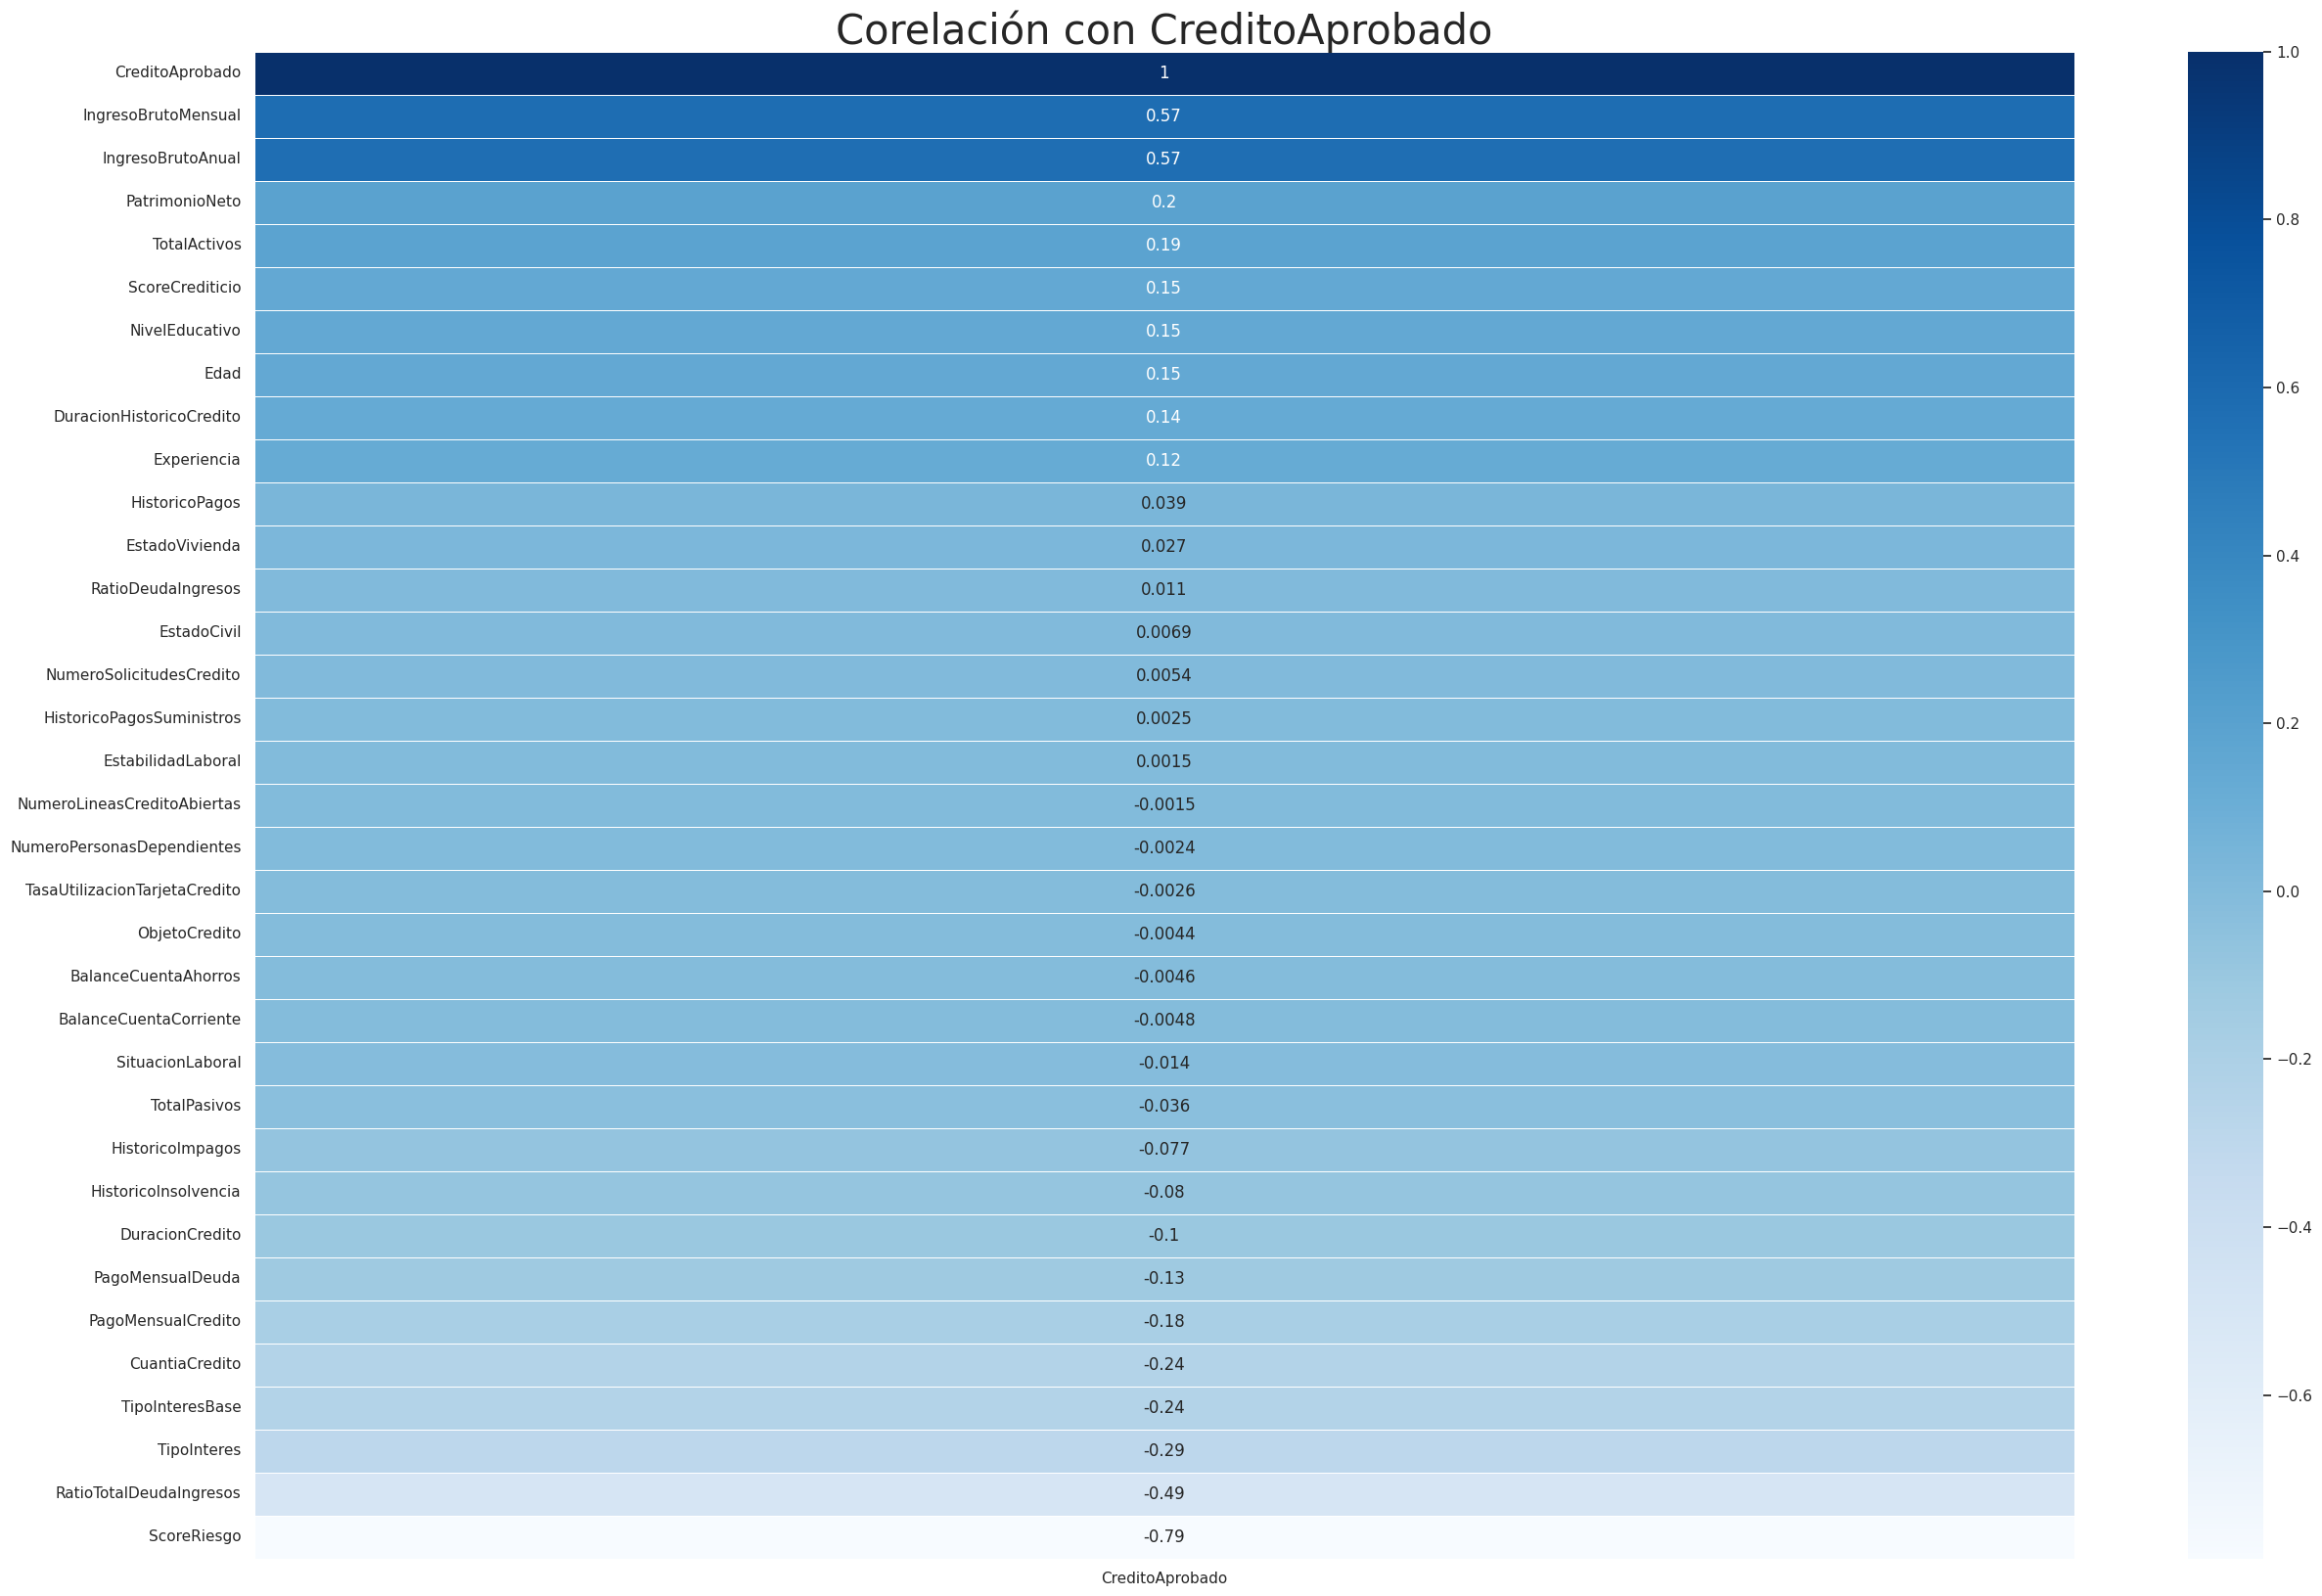

In [17]:
sns.set(style="white")
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(bd.corr()[['CreditoAprobado']].sort_values('CreditoAprobado', ascending=False), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelación con CreditoAprobado', fontsize = 30)
plt.show()

### ScoreRiesgo (Tarea de Regresión)
Correlaciones con la variable objetivo *ScoreRiesgo*.

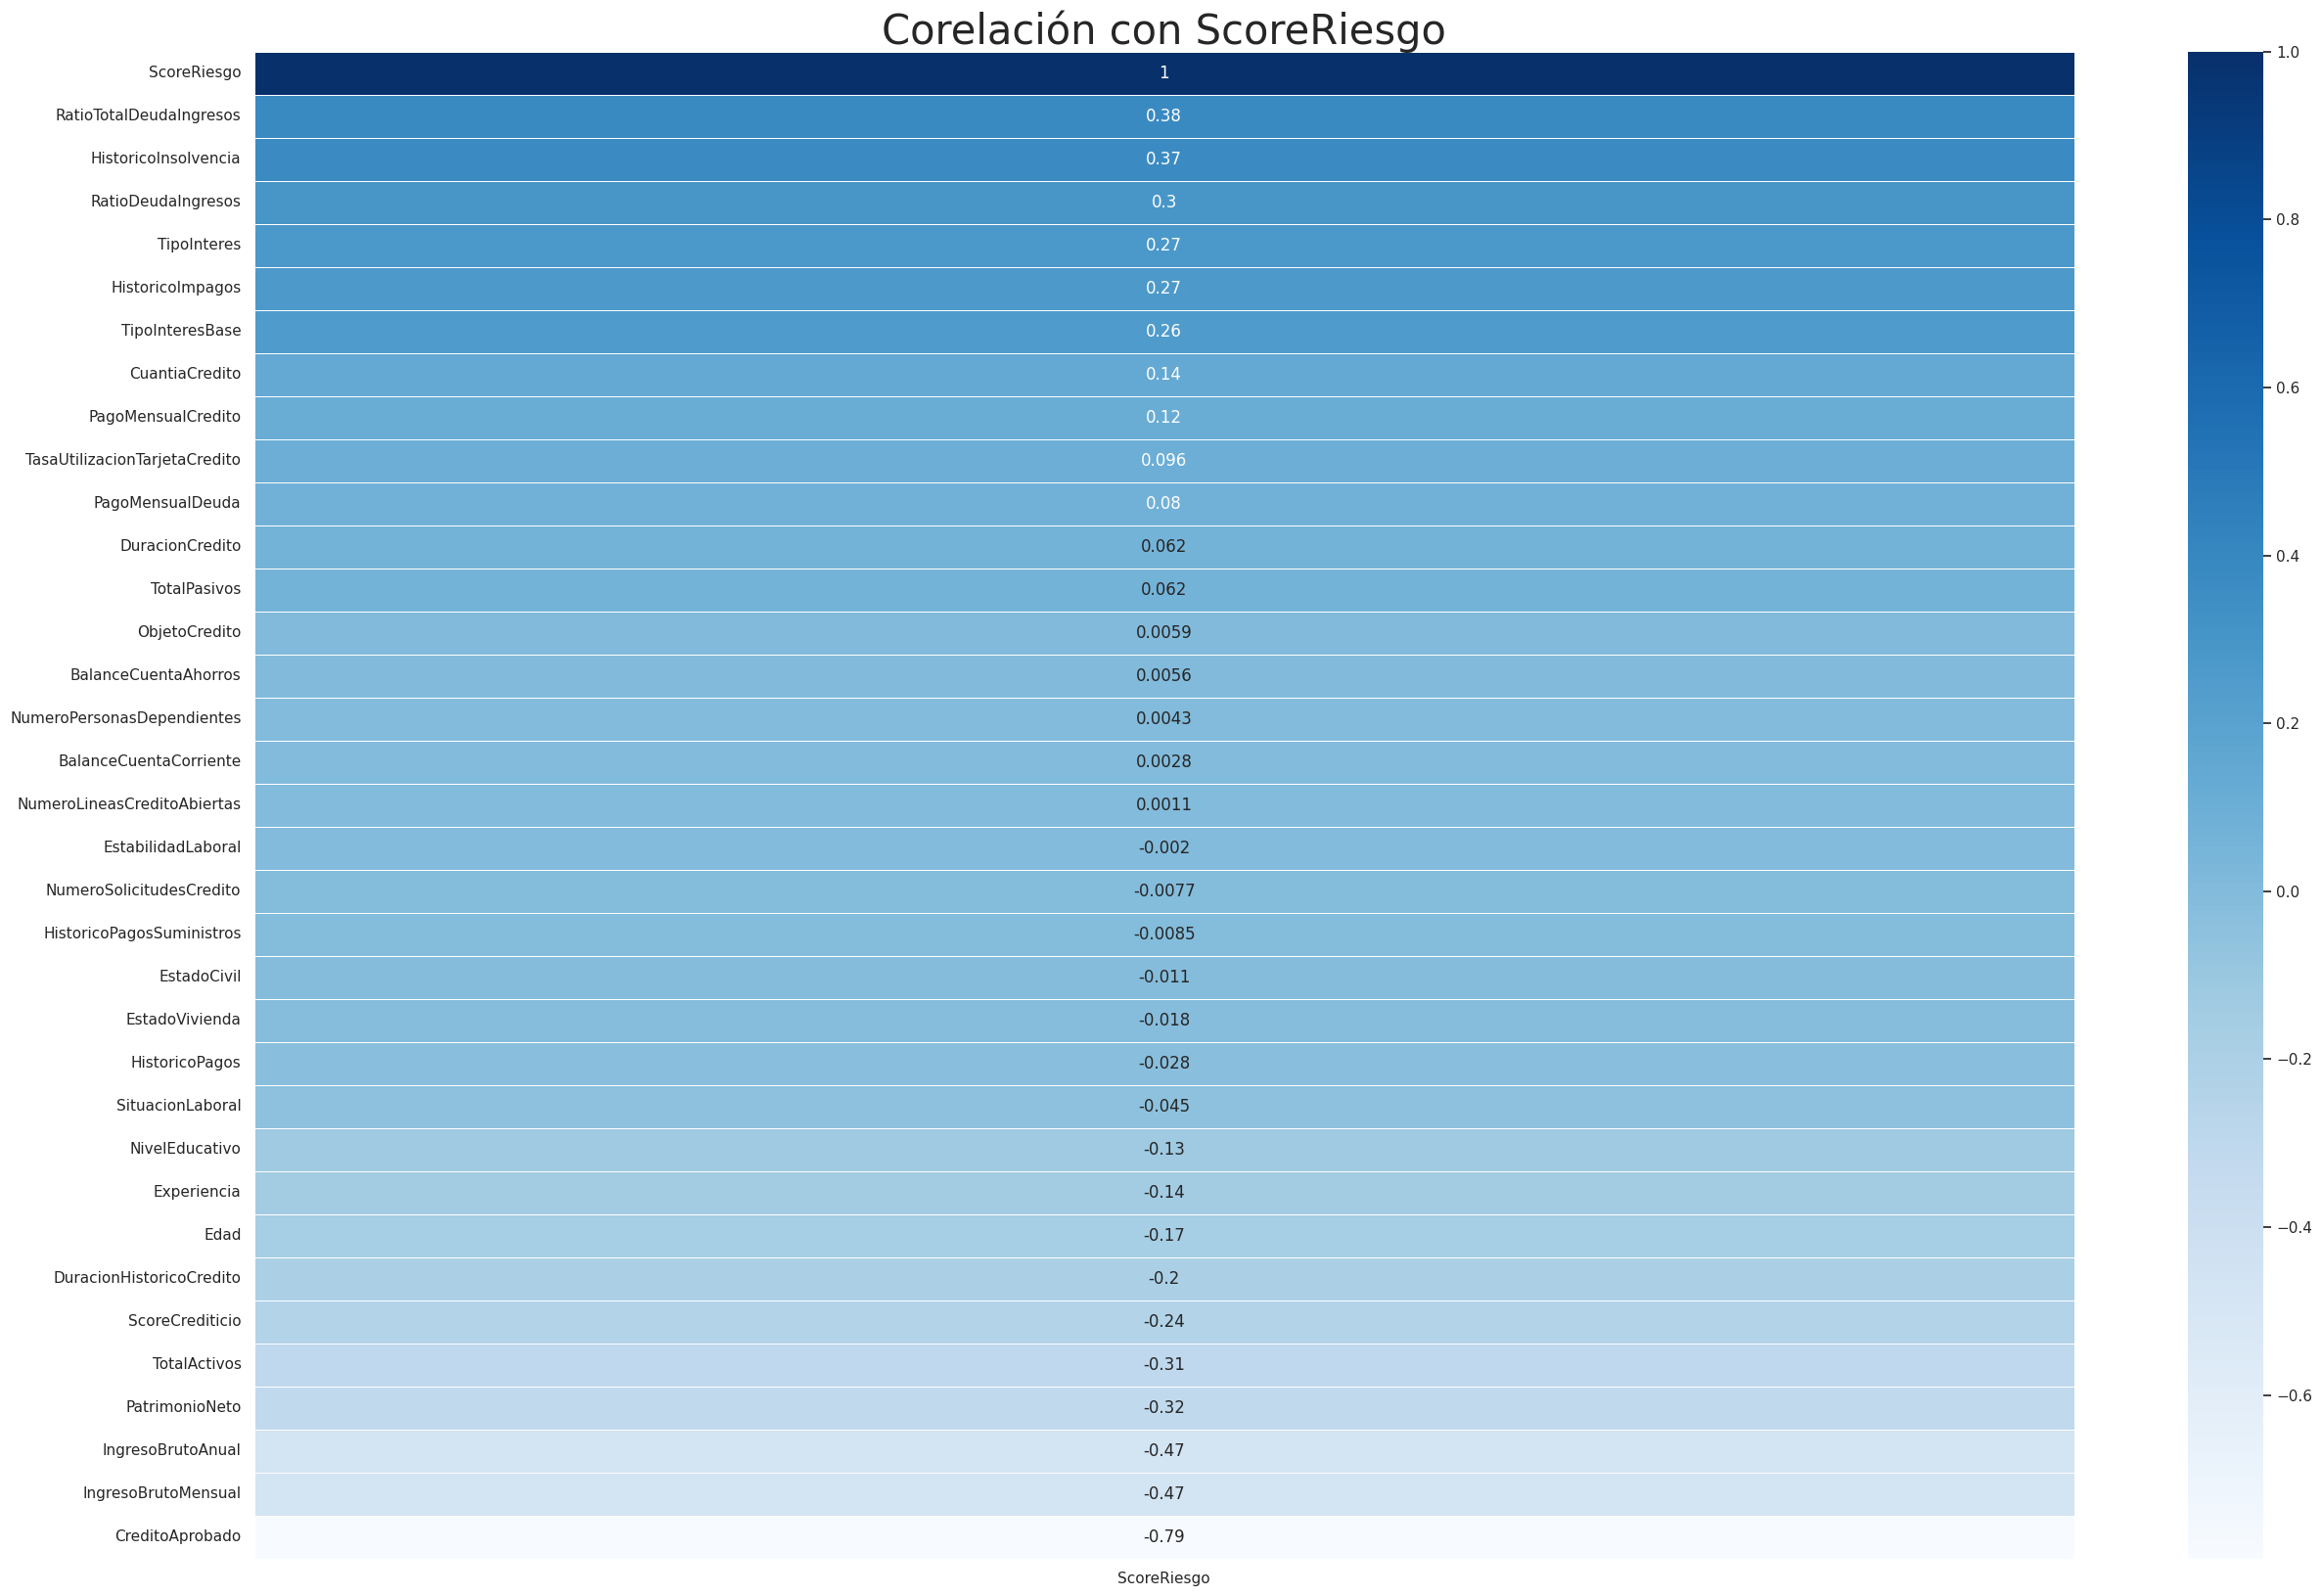

In [18]:
sns.set(style="white")
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(bd.corr()[['ScoreRiesgo']].sort_values('ScoreRiesgo', ascending=False), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelación con ScoreRiesgo', fontsize = 30)
plt.show()

### Eliminar las columnas con correlación <0.1 o >-0.1
Eliminamos aquellas variables que no están relacionadas con la variable objetivo, es decir, que no aportan ninguna información relevante.

Para la tarea de clasificación:

In [19]:
relevant_features = bd.corr()['CreditoAprobado'][abs(bd.corr()['CreditoAprobado']) > 0.1].index
bd_filtered_c = bd[relevant_features].drop('ScoreRiesgo', axis=1)

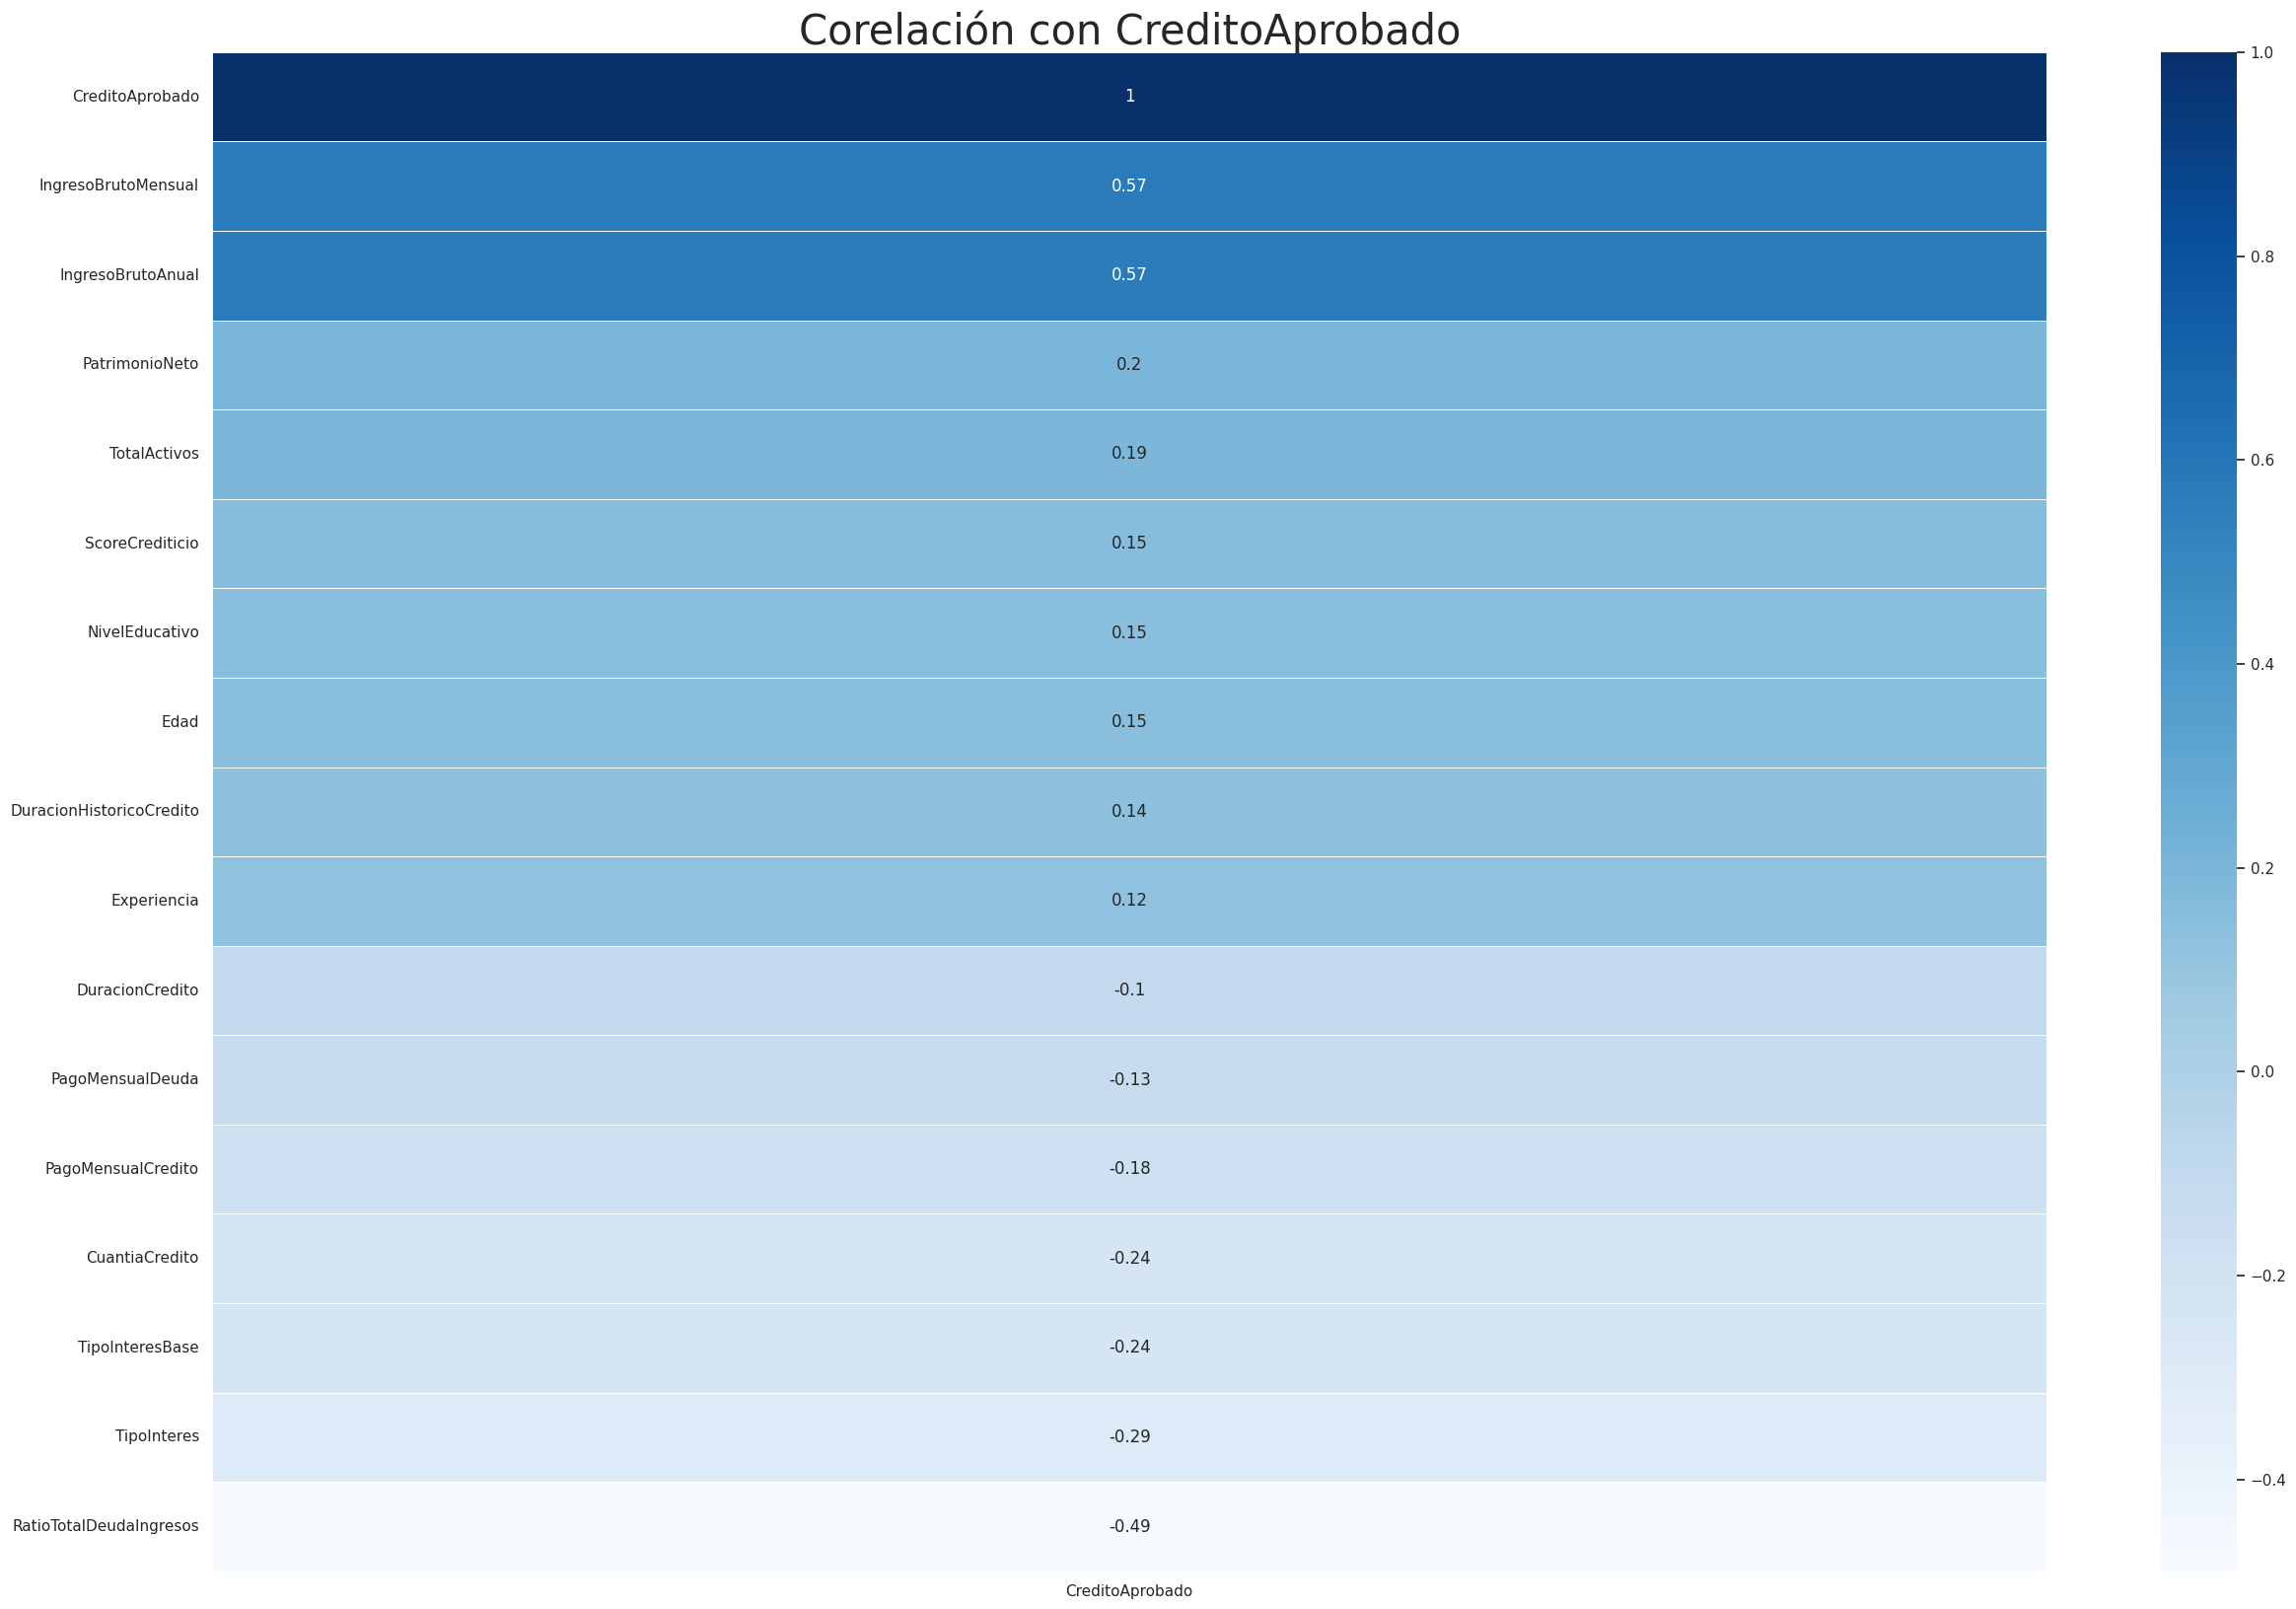

In [43]:
sns.set(style="white")
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(bd_filtered_c.corr()[['CreditoAprobado']].sort_values('CreditoAprobado', ascending=False), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelación con CreditoAprobado', fontsize = 30)
plt.show()

Podemos observar que las variables que están más relacionadas con "*CreditoAprobado*" son "*IngresoBrutoMensual*", "*IngresoBrutoAnual*", y "*RatioTotalDeudaIngresos*".

In [21]:
# Columnas restantes para la tarea de clasificación
bd_filtered_c.columns

Index(['Edad', 'IngresoBrutoAnual', 'ScoreCrediticio', 'NivelEducativo',
       'Experiencia', 'CuantiaCredito', 'DuracionCredito', 'PagoMensualDeuda',
       'DuracionHistoricoCredito', 'TotalActivos', 'IngresoBrutoMensual',
       'PatrimonioNeto', 'TipoInteresBase', 'TipoInteres',
       'PagoMensualCredito', 'RatioTotalDeudaIngresos', 'CreditoAprobado'],
      dtype='object')

Para la tarea de regresión:

In [20]:
relevant_features = bd.corr()['ScoreRiesgo'][abs(bd.corr()['ScoreRiesgo']) > 0.1].index
bd_filtered_r = bd[relevant_features].drop('CreditoAprobado', axis=1)

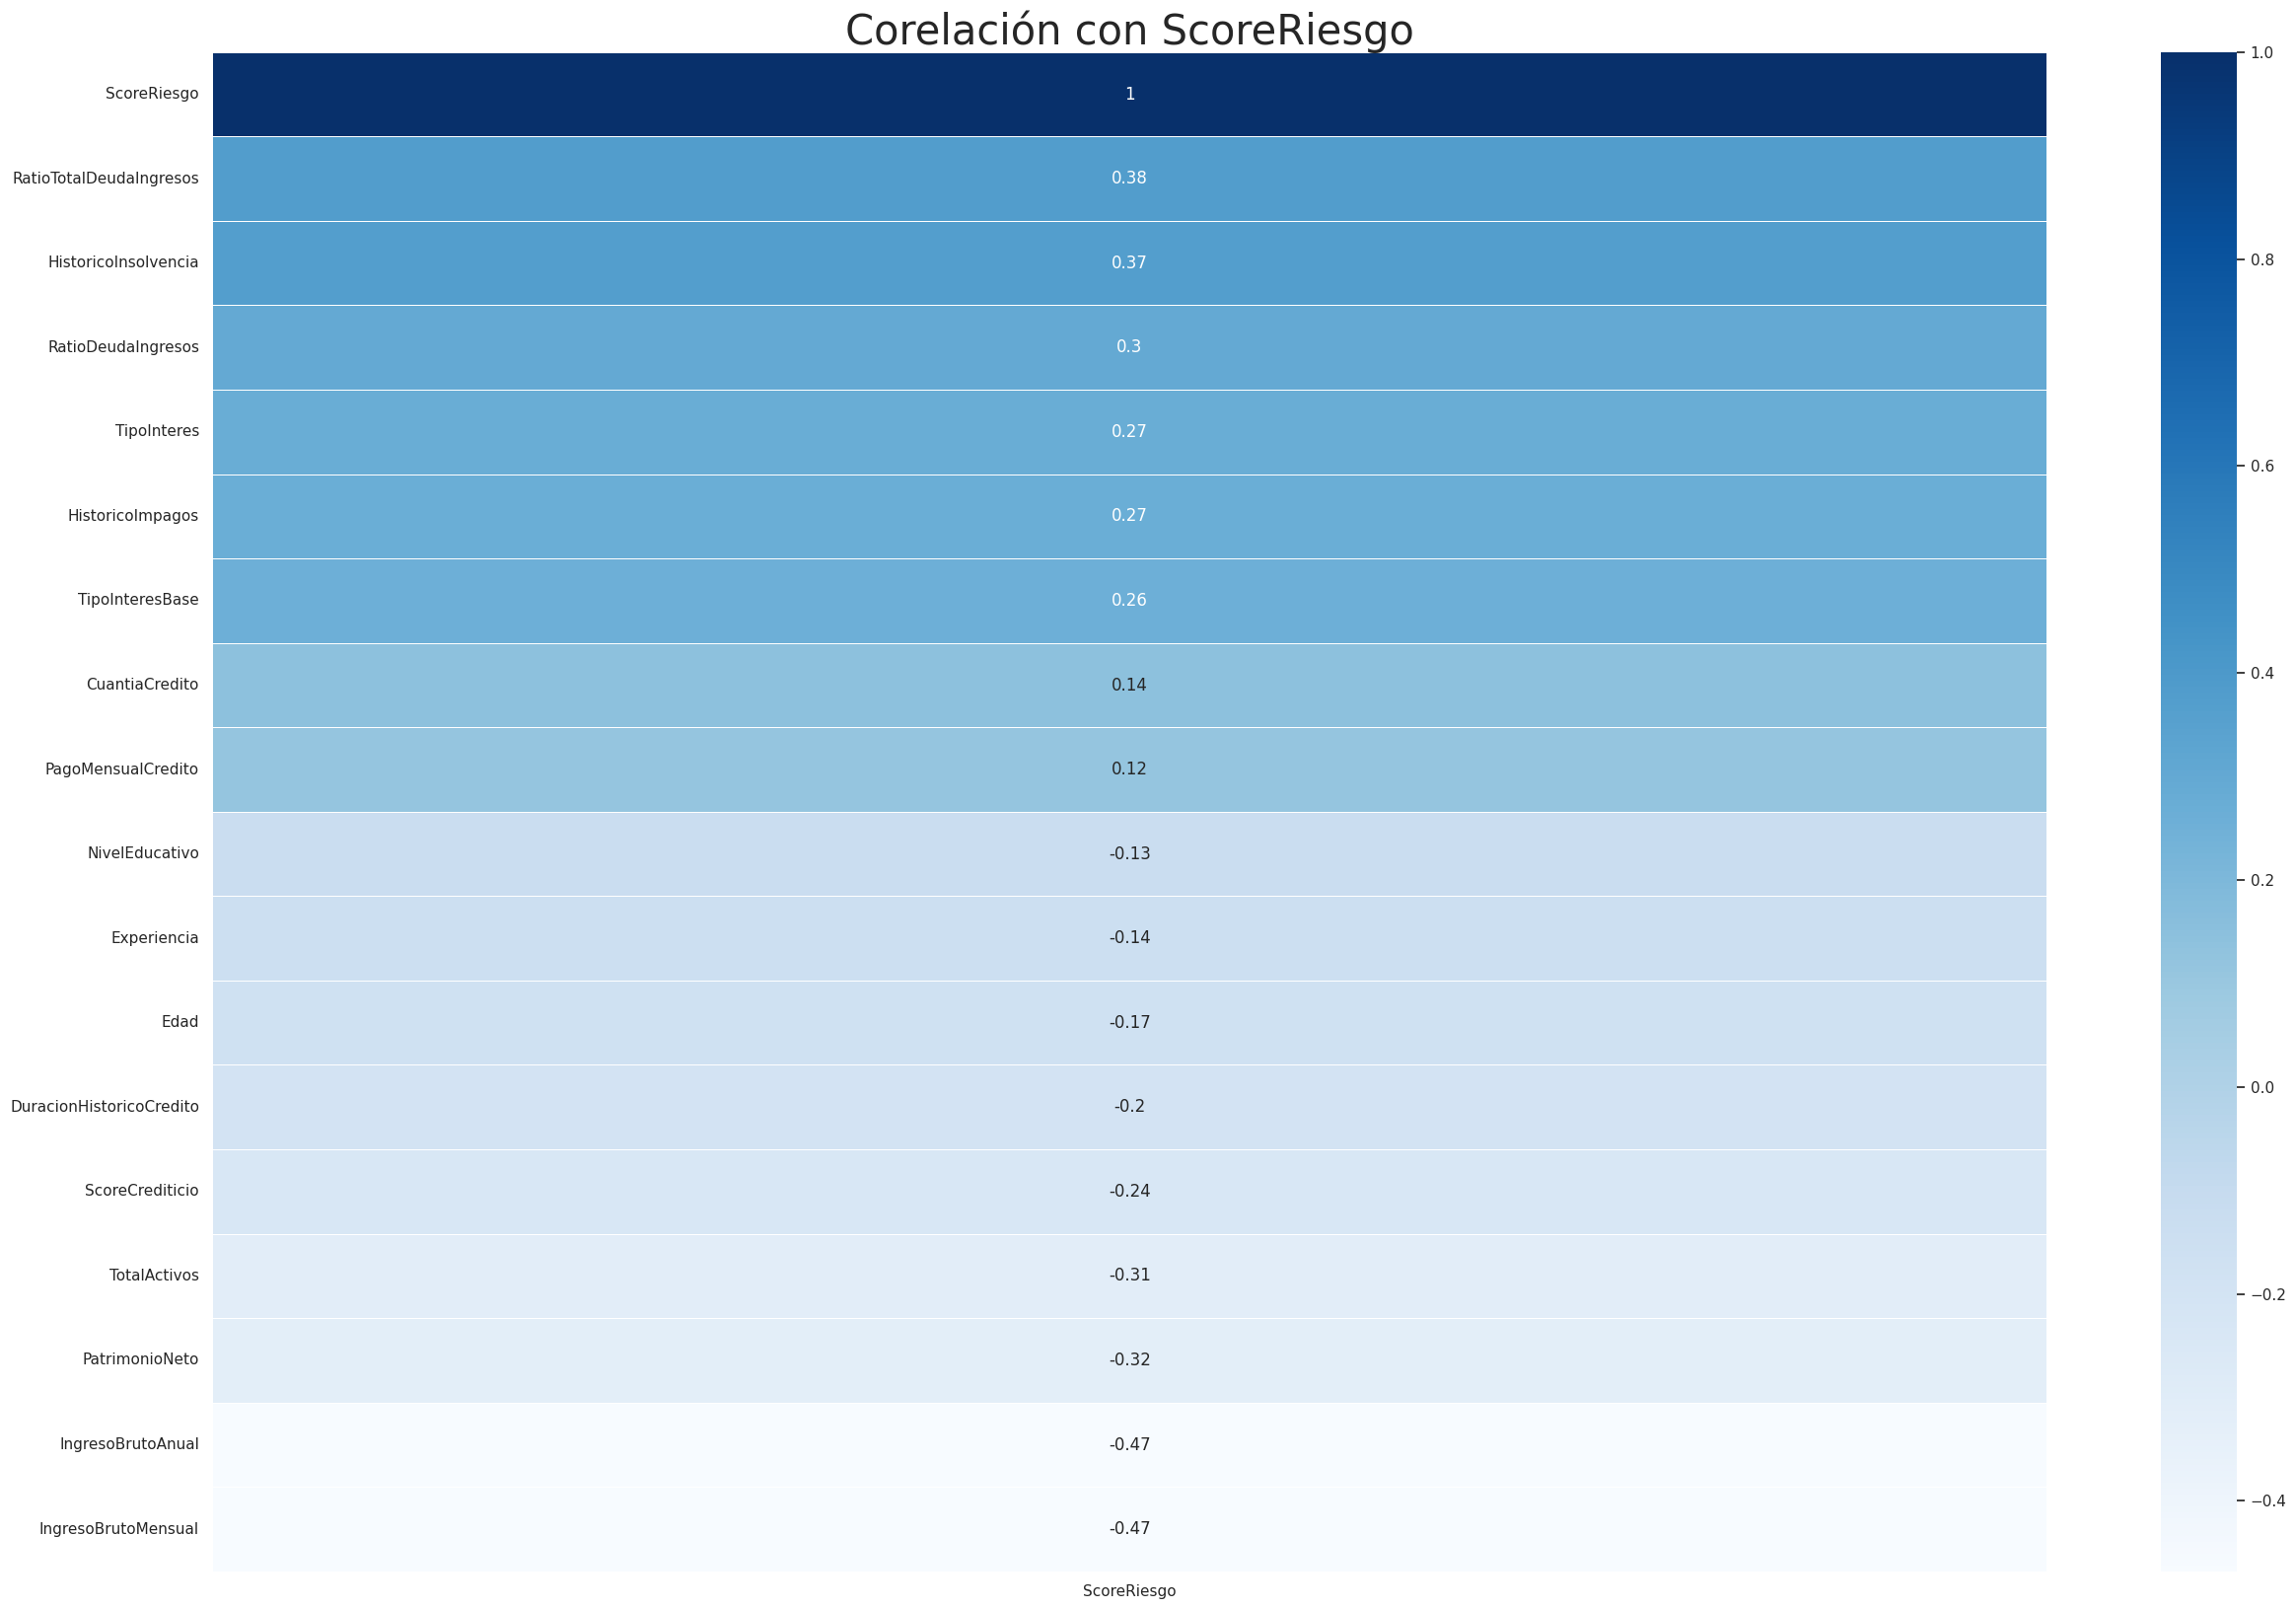

In [44]:
sns.set(style="white")
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(bd_filtered_r.corr()[['ScoreRiesgo']].sort_values('ScoreRiesgo', ascending=False), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelación con ScoreRiesgo', fontsize = 30)
plt.show()

Podemos observar que al igual que para la tarea de clasificación, las variables que están más relacionadas con "*ScoreRiesgo*" son "*IngresoBrutoMensual*", "*IngresoBrutoAnual*", y "*RatioTotalDeudaIngresos*". Sin embargo, no todas las columnas restantes son iguales para ambas tareas.

In [22]:
# Columnas restantes para la tarea de regresión
bd_filtered_r.columns

Index(['Edad', 'IngresoBrutoAnual', 'ScoreCrediticio', 'NivelEducativo',
       'Experiencia', 'CuantiaCredito', 'RatioDeudaIngresos',
       'HistoricoInsolvencia', 'HistoricoImpagos', 'DuracionHistoricoCredito',
       'TotalActivos', 'IngresoBrutoMensual', 'PatrimonioNeto',
       'TipoInteresBase', 'TipoInteres', 'PagoMensualCredito',
       'RatioTotalDeudaIngresos', 'ScoreRiesgo'],
      dtype='object')

## Dividir en Train y Test
Dividimos la base de datos en dos subconjuntos de datos:

*   Train (80%): X_train, y_train para entrenar los modelos.
*   Test (20%): X_test, y_test para evaluarlos.



In [23]:
# Separamos los atributos y las etiquetas (variables objetivo)
X_c = bd_filtered_c.iloc[:, :-1]
y_c = bd_filtered_c.iloc[:, -1:]
X_r = bd_filtered_r.iloc[:, :-1]
y_r = bd_filtered_r.iloc[:, -1:]

In [24]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.2, random_state=42)

Balanceamos los datos de la tarea de clasificacion mediante la técnica de sobremuestreo SMOTE, creando instancias sintéticas para la clase minoritaria, en nuestro caso, la clase 1. De esta forma, obtenemos una base de datos balanceada con el mismo número de instancias para cada una de las clases, evitando que nuestro modelos estén sesgados.

In [25]:
s = SMOTE()
X_train_c, y_train_c = s.fit_resample(X_train_c, y_train_c)

y_train_c.value_counts()

,count
CreditoAprobado,
0.0,26295
1.0,26295


## Normalizar los datos
Establecemos una escala común entre las distintas variables. De tal forma que prevenimos que ciertas variables con un rango mayor de valores como es por ejemplo "*IngresosBrutosAnuales*" ([15.000, 300.000]), tenga mayor peso sobre aquellas con un rango menor como la variable "*Edad*" ([18, 80]).

Por otro lado, hemos decidido utilizar el método *StandardScaler* para normalizar los datos en vez de *MinMaxScaler* y *RobustScaler*. Esto es debido a que *MinMaxScaler* es ideal para datos que no siguen una distribución normal (la mayoría de las columnas en nuestra base de datos sí siguen una distribución normal), y *RobustScaler* para lidiar con outliers (problema que ya hemos resuelto en las secciones anteriores de este cuaderno).

In [26]:
# Clasificación
for columna in X_train_c.columns:
    scaler = StandardScaler()
    X_train_c[columna] = scaler.fit_transform(X_train_c[[columna]])
    # Guardamos el scaler para cada una de las columnas
    joblib.dump(scaler, f'scalers/scaler_{columna}.pkl')

for columna in X_test_c.columns:
    # Cargamos el scaler correspondiente a cada columna
    scaler = joblib.load(f'scalers/scaler_{columna}.pkl')
    X_test_c[columna] = scaler.transform(X_test_c[[columna]])

# Regresión
for columna in X_train_r.columns:
      X_train_r[columna] = scaler.fit_transform(X_train_r[[columna]])
      # Guardamos el scaler para cada una de las columnas
      joblib.dump(scaler, f'scalers/scaler_{columna}.pkl')

for columna in X_test_r.columns:
    # Cargamos el scaler correspondiente a cada columna
    scaler = joblib.load(f'scalers/scaler_{columna}.pkl')
    X_test_r[columna] = scaler.transform(X_test_r[[columna]])

**NOTA**: Hemos empleado la ténica de SMOTE y la normalización tras dividir la base de datos en train y test, para evitar que el modelo se sobreajuste en caso de estar basado en instancias del test durante el entrenamiento y aprendizaje de este. Asimismo, habría sido mejor eliminar los outliers solo para la base de datos de train.

# Guardar datasets procesados
Guardamos las bases de datos limpiadas y procesadas para su posterior uso en el entramiento y evaluación de modelos para ambas tareas de clasificación y regresión.

In [30]:
# Clasificación
X_train_c.to_csv('data/clasificación/X_train.csv', index=False)
y_train_c.to_csv('data/clasificación/y_train.csv', index=False)
X_test_c.to_csv('data/clasificación/X_test.csv', index=False)
y_test_c.to_csv('data/clasificación/y_test.csv', index=False)

# Regresión
X_train_r.to_csv('data/regresión/X_train.csv', index=False)
y_train_r.to_csv('data/regresión/y_train.csv', index=False)
X_test_r.to_csv('data/regresión/X_test.csv', index=False)
y_test_r.to_csv('data/regresión/y_test.csv', index=False)